In [32]:
import numpy as np
from matplotlib import pyplot as plt
from src.kalman import Kalman

In [33]:
n = 10

x1 = np.linspace(10,5,n)
x1 = x1.reshape(n,1)
x2 = np.linspace(0,-5,n)
x2 = x2.reshape(n,1)
y1 = np.linspace(10,5,n)
y1 = y1.reshape(n,1)
y2 = np.linspace(0,-5,n)
y2 = y2.reshape(n,1)

zero = np.zeros((n,1))


x = np.vstack((np.vstack((x1,zero)),x2))
y = np.vstack((np.vstack((y1,zero)),y2))


def noiseVector(n):
    """
    Generates a vector of noise values
    """
    return np.random.randn(n*3)[0] * 3

noisex = noiseVector(n)
noisey = noiseVector(n)
noisez = noiseVector(n)

model_z = 2*x + 0.1*y
# model_z = model_z.reshape()


measurement_z = model_z + noisez

print(measurement_z.shape)
model = np.array([x,y,model_z]).reshape(3,3*n)



measurement = np.array([x+noisex,y+noisey,measurement_z]).reshape(3,3*n)

#make the middle part of measurement zero
measurement[:,n:2*n] = np.zeros((3,n))

measurement.T[0], measurement.T[-1], model.T[0], model.T[-1]

measurement.T[0].shape,model.shape

measurement.shape

(30, 1)


(3, 30)

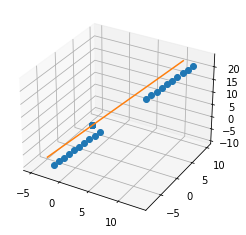

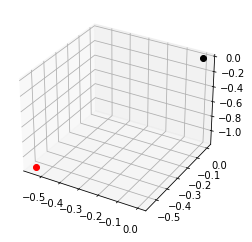

In [34]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')

v = -(model.T[0] - model.T[1])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(v[0],v[1],v[2],'o',label='v',color='red')
ax.plot(0,0,0,'o',label='origin',color='black')

In [35]:

def kalmanPosition(measurement, x_prediction, P_prediction, Q, R):
    """
    Kalman filter for position
    input:
        measurement: measured x,y,z
        x_prediction: x,y,z prediction from previous iteration
        P_prediction: covariance matrix from previous iteration
        Q: process noise covariance matrix
        R: measurement noise covariance matrix
        k: iteration number
    output:
        x_prediction: x,y,z prediction from current iteration
        P_prediction: covariance matrix from current iteration
    """
    # A = np.array([[v[0]*k,0,0],[0,v[1]*k,0],[0,0,v[2]*k]])
    A = np.eye(3)
    B = v 
    
    # Prediction
    x_prediction = A @ x_prediction + B
    P_prediction = A @ P_prediction @ A.T + Q
    

    # Update
    if measurement[0] != 0:
        H = np.eye(3)
        K = P_prediction @ H.T @ np.linalg.inv(H @ P_prediction @ H.T + R)
        x_prediction = x_prediction + K @ (measurement - H @ x_prediction)
        P_prediction = (np.eye(3) - K @ H) @ P_prediction


    return x_prediction, P_prediction



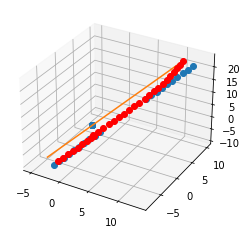

In [36]:
r_xy = 15
r_z = 15
x_init = model.T[0]

P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman_estimates = np.zeros_like(measurement).T
kalman_estimates[0] = x_init

for i in range(n*3-1):
    x_prediction, P_prediction = kalmanPosition(measurement.T[i],x_init,P_init,Q_init,R_init)
    kalman_estimates[i+1] = x_prediction
    x_init = x_prediction
    P_init = P_prediction
    

kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')
ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'o',label='kalman_estimates',color='red')

In [37]:

r_xy = 15
r_z = 15
x_init = model.T[0]


P_init = np.eye(3)
Q_init = np.eye(3)
R_init = np.array([[r_xy,0,0],[0,r_xy,0],[0,0,r_z]])

kalman = Kalman(measurement, v, x_init, P_init, R_init)



kalman_estimates = kalman.positionUpdate()
# kalman_estimates.T


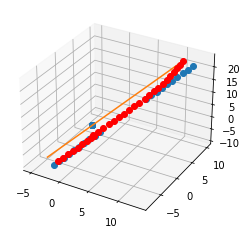

In [38]:
kalman_estimates = kalman_estimates.T

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(measurement[0],measurement[1],measurement[2],'o',label='measurement')
ax.plot(model[0],model[1],model[2],'-',label='model')
ax.plot(kalman_estimates[0],kalman_estimates[1],kalman_estimates[2],'o',label='kalman_estimates',color='red')